In [69]:
import OperatorEmbedding
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [3]:
model = OperatorEmbedding.getModel('./operator_embedding.ebd')

In [4]:
word_vectors = np.array([model.wv[w] for w in model.wv.vocab])
dimen_selector = PCA()
dimen_selector.fit(word_vectors)



PCA()

Text(0.6994954466819763, 0.011762868165969848, 'tan')

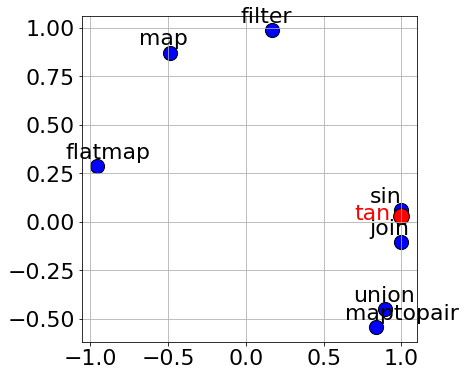

In [84]:
# 必须要有 ['tan', 'filter', 'map', 'flatmap']，因为这些是论文里举的例子，‘flatmap'是新插入的，所以再找几个接近它的和远离它的
words = [ 'filter', 'map', 'flatmap', 'sin', 'join', 'union', 'maptopair']
word_vectors = np.array([model.wv[w] for w in words])
twodim = dimen_selector.transform(word_vectors)[:,:2]
normalized_twodim = preprocessing.normalize(twodim)

new_word_vector = np.array([model.wv['tan']])
dim = dimen_selector.transform(new_word_vector)[:,:2]
normalized_dim = preprocessing.normalize(dim)

plt.rc('font', size=22)
plt.figure(figsize=(6,6))
plt.scatter(normalized_twodim[:,0], normalized_twodim[:,1], edgecolors='k', c='b',s=200)
plt.scatter(normalized_dim[:,0], normalized_dim[:,1], edgecolors='k', c='r', s=250)

plt.grid()
# fig = plt.gcf()
# ax = fig.gca()
# circle = plt.Circle((0,0), 1, color='b')
# ax.add_patch(circle)
# plt.scatter(twodim[:3][:,0],twodim[:3][:,1], marker='o', edgecolors='b', c='r')
# plt.scatter(twodim[3:5][:,0],twodim[3:5][:,1], marker='^', edgecolors='b', c='b')
# plt.scatter(twodim[5:7][:,0],twodim[5:7][:,1], marker='x', edgecolors='b', c='y')
# plt.scatter(twodim[7:][:,0],twodim[7:][:,1], marker='s', edgecolors='b', c='g')
for word, (x,y) in zip(words, normalized_twodim):
    plt.text(x-0.2, y+0.04, word)

plt.text(normalized_dim[0][0]-0.3, normalized_dim[0][1]-0.02, 'tan', color='r')


In [73]:
help(plt.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=<deprecated parameter>, edgecolors=None, *, plotnonfinite=False, data=None, **kwargs)
    A scatter plot of *y* vs. *x* with varying marker size and/or color.
    
    Parameters
    ----------
    x, y : float or array-like, shape (n, )
        The data positions.
    
    s : float or array-like, shape (n, ), optional
        The marker size in points**2.
        Default is ``rcParams['lines.markersize'] ** 2``.
    
    c : array-like or list of colors or color, optional
        The marker colors. Possible values:
    
        - A scalar or sequence of n numbers to be mapped to colors using
          *cmap* and *norm*.
        - A 2-D array in which the rows are RGB or RGBA.
        - A sequence of colors of length n.
        - A single color format string.
    
        Note that *c* should not be a single nu

In [20]:
def display_pca_scatterplot(model, words=None):
    word_vectors = np.array([model.wv[w] for w in model.wv.vocab])
    dimen_selector = PCA()
    dimen_selector.fit(word_vectors)

    if words == None:
        words = [ word for word in model.wv.vocab ]
        
    word_vectors = np.array([model.wv[w] for w in words])

    twodim = dimen_selector.transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x-0.001, y+0.002, word)

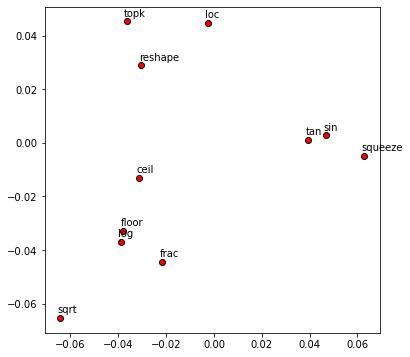

In [26]:
display_pca_scatterplot(model,['tan', 'sin', 'sqrt', 'ceil', 'floor', 'frac', 'log', 'loc', 'reshape', 'squeeze', 'topk'])

In [41]:
model.wv.most_similar('sqrt')

[('keyby', 0.8881242275238037),
 ('sample', 0.8641586899757385),
 ('min', 0.8359659314155579),
 ('rebalance', 0.7218766212463379),
 ('cos', 0.7206661701202393),
 ('srcfromdb', 0.6069864630699158),
 ('frac', 0.5893212556838989),
 ('top', 0.5381540060043335),
 ('flatmap', 0.4401175081729889),
 ('floor', 0.40974360704421997)]

In [18]:
model.wv.most_similar(positive=['tan', 'sin'], negative=['cos'])

[('join', 0.8028326630592346),
 ('save', 0.6284148693084717),
 ('squeeze', 0.5504430532455444),
 ('filter', 0.5218644142150879),
 ('first', 0.48533156514167786),
 ('union', 0.4667537212371826),
 ('sortby', 0.4040205180644989),
 ('select', 0.40283650159835815),
 ('count', 0.3610661029815674),
 ('rescale', 0.3557322025299072)]